In [1]:
import numpy as np
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
altitud_df=pd.read_csv('/content/drive/MyDrive/Maestria Andes/Applied data science/Proyecto DS 2024/Data/altitudes.csv')

In [4]:
altitud_df[altitud_df['altitud'].isnull()==False].shape[0]/altitud_df.shape[0]

0.9386868686868687

In [5]:
# response=requests.get('https://api.open-meteo.com/v1/elevation?latitude=-9.856322&longitude=34.938093')
# response.status_code

In [18]:
for index, row in altitud_df.iterrows():
    if np.isnan(row['altitud']):
      lat=row['latitude']
      lon=row['longitude']
      url = f'https://api.open-meteo.com/v1/elevation?latitude={lat}&longitude={lon}'
      response = requests.get(url)
      if response.status_code == 200:
          data = response.json()
          altitud_df.at[index, 'altitud'] = data['elevation'][0]
      else:
          print(f"Error en la petición: {response.status_code}")
          break

In [19]:
altitud_df[altitud_df['altitud'].isnull()==False].shape[0]/altitud_df.shape[0]

1.0

In [20]:
x=altitud_df[altitud_df['altitud'].isnull()==False].copy()
print(x.shape[0])
x['diferencia']=abs(x['altitud']-x['gps_height'])

59400


In [21]:
ruta_carpeta = '/content/drive/MyDrive/Maestria Andes/Applied data science/Proyecto DS 2024/Data'
altitud_df.to_csv(f'{ruta_carpeta}/altitudes.csv')

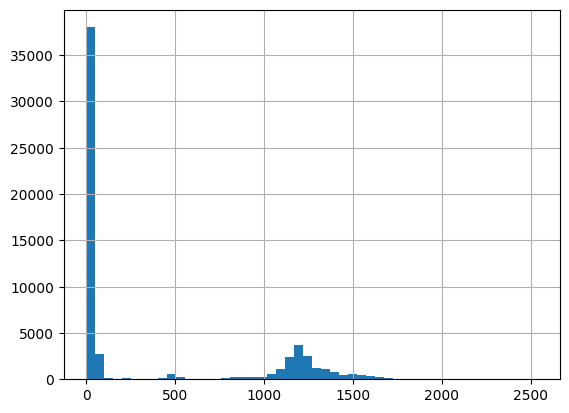

In [22]:
x['diferencia'].hist(bins=50)
plt.show()

In [23]:
x['diferencia'].describe()

,diferencia
count,59400.000000
mean,387.027071
std,565.693450
min,0.000000
25%,12.000000
50%,31.000000
75%,1096.000000
max,2535.000000
